# CS598 CASS Notebook


# Introduction
The paper we have selected is focused on Cross Architectural Self-Supervision for Healthcare Applications.

## Background
* **Type of Problem** The major type of problem being solved by CASS is related to representation learning and data processing:
  - Existing self-supervised learning models often require expensive computational resources not widely available.
  - Medical imaging and Artificial Intelligence is often limited by a scarcity in prelabeled training data.

  To mitigate these issues, the authors propose *CASS* which allows for training CNN's and Transformers which can reduce pretraining time using less data and less computing resources.

  **Importance**: Representation learning allows us to use self-supervision to learn useful priors by pretraining unlabeled images. This is crucially important because the medical imaging field suffers from a lack of available labeled data due to a variety of factors, such as the high cost of labeling data at scale because it generally requires domain-specific knowledge. In fields with limited data or high cost to produce labels, we can use self-supervision to help with the downstream learning process without the need for labels. Solving these issues is important because it might allow for the expansion of machine learning and artificial intelligence research into more scenarios which might have previously been hindered by a lack of data or computing resources.

  **Difficulty**: Existing state-of-the-art self-supervised learning methods have extreme computational requirements that make them inaccessible to most practitioners. Additionally, the limited amount of data makes it infeasible to run smaller epochs with larger batch size to achieve the effectiveness outlined in these self-supervised learning methods.
  Overcoming the problem is difficult in that it is often a matter of logistics and practicality. For example, gaining labeled data might be impossible for a relatively new disease like COVID-19, as the authors describe in their paper.
  
  **State of the art methods and effectiveness**: As detailed above, existing state of the art methods for representation learning face challenges due to significant computational requirements and limited data availability. Traditionally, contrastive self-supervision methods use different augmentations of images to create positive pairs. Because of this, augmentations are applied twice which increases time complexity overall. Additionally, parameter sharing between the two architectures increases the time complexity when re-initializing architectures with lagging parameters. Additionally, smaller epochs and batch sizes tend to hurt performance.The current "state of the art" in terms of broad use is *Transfer Learning*, where a model developed for one task is reused as the starting point for a model on a second task. This is practical for scenarios in which there is a lack of data. The authors note that this is common in medical research due to issues such as patient privact or disease prevalence. However, CASS represents a different approach known as *Self-Supervised Learning*.

# Paper Explanation

## The Proposal
In the paper, the authors acknowledge that self-supervisied learning is generally superior to Transfer Learning, but they require multiple advanced graphical processing units (GPU's) running over the course of several days, something many researchers might consider a luxury both in terms of time and money.
Additionally, many self-supervised models suffer in terms of performance when run with small batch sizes.

To this end, the authors propose combining a convolutional neural network (CNN) with a transformer in a "response-based siamese contrastive method".

## The Innovations

CASS helps solve our general problem while mitigating these challenges by leveraging CNN and Transformer methods for efficient learning in a siamese contrastive method. CASS leverages architecture invariance instead of using the augmentation invariance approach of existing methods. Extracted representations of each input image are compared across two branches representing each respective architecture. By contrasting their extracted features, they can learn from each other on patterns they would generally miss. This helps provide more useful pre-trained data for the downstream learning method.

## Metrics (How Well it Worked)
CASS's approach helps reduce the time complexity of pre-training in two major ways. First, augmentations are only applied once in CASS in comparison to twice in augmentation invariance approaches. Therefore per application CASS uses less augmentations overall. Second, there is no scope for parameter sharing in CASS because the two architectures used are different. A large portion of time is saved in updating the two architectures each epoch as opposed to re-initializing architectures with lagging parameters. CASS has also been proven to handle smaller epochs and batch sizes with better performance overall.

## Contribution to Research Regime
The contribution is extremely important to the research regime. Without CASS certain representation learning problems would not be feasible to solve because of computational requirements and data availability. CASS overcomes those challenges while achieving even better performance.
CASS is recognized as a cutting-edged self-supervision learning method with accolades advertised on its' Github page such as:
- *State of the Art*: Partial Label Learning on Autoimmune Dataset
- *State of the Art*: Classification on Brain Tumor MRI Dataset
- *State of the Art*: State of the Art: Classification on ISIC 2019


# Scope of Reproducibility


1. **Hypothesis 1**: Leveraging the CASS self-supervised learning approach will significantly improve the efficiency of representation learning in healthcare applications in scenarios which involve a lack of data or computing resources: TODO INSERT EXPERIMENT DETAILS
2. **Hypothesis 2 (Ablation study)**: Reducing the number of pre-training epochs and batch sizes for the CASS model will still allow for strong model performance in comparison with existing methods: TODO INSERT EXPERIMENT DETAILS


# Methodology

## Data

The data source for our project is the PathMNIST dataset located within the larger MedMNIST database. The MedMNIST data is curated by researchers from several universities, such as: Shanghai Jiao Tong University, RWTH Aachen University, and Harvard University.

PathMNIST in particular is a collection of images corresponding to Colon Pathology with regard to (9) different classes or "labels".

The dataset is located here: https://zenodo.org/records/10519652 but for our purposes, we chose to utilize the Python package (https://pypi.org/project/medmnist/).

- Source of the data: where the data is collected from
- if data is synthetic or self-generated, explain how.
- - If possible, please provide a link to the raw datasets.
Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc.
- Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.
- Illustration: printing results, plotting figures for illustration.

You can upload your raw dataset to Google Drive and mount this Colab to the same directory. If your raw dataset is too large, you can upload the processed dataset and have a code to load the processed dataset

### Connect to Google Drive (for Brain Tumor Dataset)

In [1]:
import os

# If running locally, set this to true
is_local = True

# If the datasets are on your Google Drive
is_on_my_drive = True

datasets_path = ""
if not is_local:
    # If running on Google Colab, mount the drive
    from google.colab import drive

    drive.mount("/content/drive")  # link to drive hosting the datasets


    datasets_path = (
        "/content/drive/My Drive/598-58/datasets"
        if is_on_my_drive
        else "/content/drive/Shared with me/598-58/datasets"
    )
else:
    # If running locally, set the path to the datasets folder
    datasets_path = "./datasets"


# test drive access ; list files in the specified folder
files = os.listdir(datasets_path)
print(files)

['brain-tumor-dataset']


In [2]:
# install necessary libraries (from requirements.txt)
%pip install einops==0.4.1
%pip install numpy==1.25.0
%pip install pandas==1.5.0
%pip install mat73
%pip install matplotlib==3.7.1
%pip install matplotlib-inline==0.1.2
%pip install Pillow==9.2.0
%pip install scikit-learn==1.1.1
%pip install scipy==1.9.0
%pip install tensorboard==2.9.1
%pip install timm==0.5.4
%pip install torch==1.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install torchtext==0.12.0
%pip install torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install torchcontrib==0.0.2
%pip install torchmetrics==0.9.2
%pip install torchvision==0.12.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install vit-pytorch==0.35.8
%pip install pytorch-lightning==1.6.5
%pip install tqdm==4.64.0
%pip install medmnist

  Using cached einops-0.4.1-py3-none-any.whl.metadata (10 kB)
Using cached einops-0.4.1-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 12.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 23.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 43.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 8.9 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 63.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24

### Datasets


### Brain Tumor MRI database
https://figshare.com/articles/dataset/brain_tumor_dataset/1512427


#### Pre-Processing Brain Tumor MRI Data

This data exists in a collection of folders in Google Drive, and are in the matlab data format. It must be processed for use in CASS.

In [59]:
import mat73
import matplotlib.pyplot as plt
import os
import scipy.io

from torch.utils.data import Dataset, DataLoader


class BrainTumorDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.file_list = self._get_file_list()

        # Implement any necessary preprocessing here
        self.transform = None

    def _get_file_list(self):
        file_list = []
        directories_found = []
        # Recursively walk through the directory
        for dir_name, _, file_names in os.walk(self.root_dir):
            directories_found.append(dir_name)
            # Check if the directory name starts with 'brainTumorDataPublic' and append all .mat files
            if "/brainTumorDataPublic" in dir_name:

                file_list.extend(
                    [
                        os.path.join(dir_name, file)
                        for file in file_names
                        if file.endswith(".mat")
                    ]
                )

        print(
            f"Found {len(file_list)} .mat files in these {len(directories_found)} directories: {directories_found}"
        )
        return file_list

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        mat_path = self.file_list[idx]

        # Use mat73 to load the .mat files
        mat_data = mat73.loadmat(mat_path)
        # mat_data = scipy.io.loadmat(mat_path)
        cjdata = mat_data["cjdata"]

        # sample_mat_data = scipy.io.loadmat(sample_mat_path)

        # use for debug
        print(f"Keys in the sample .mat file: {cjdata.keys()}")


        image = cjdata["image"]
        label = cjdata["label"]
        pid = cjdata["PID"]
        tumorBorder = cjdata["tumorBorder"]
        tumorMask = cjdata["tumorMask"]

        # Apply transformations if any
        if self.transform:
            image = self.transform(image)

        sample = {
            "image": image,
            "label": label,
            "pid": pid,
            "tumorBorder": tumorBorder,
            "tumorMask": tumorMask,
        }
        return sample


# Initialize dataset
brain_tumor_dataset = BrainTumorDataset(root_dir=datasets_path)

# Create a DataLoader
data_loader = DataLoader(brain_tumor_dataset, batch_size=4, shuffle=True)

Found 3064 .mat files in these 6 directories: ['./datasets', './datasets/brain-tumor-dataset', './datasets/brain-tumor-dataset/brainTumorDataPublic_7671532', './datasets/brain-tumor-dataset/brainTumorDataPublic_15332298', './datasets/brain-tumor-dataset/brainTumorDataPublic_22993064', './datasets/brain-tumor-dataset/brainTumorDataPublic_1766']


### Exploratory Data Analysis: Brain Tumor MRI Data

In [55]:
%pip install mat73

import mat73
import matplotlib.pyplot as plt

# Print the total Length of Files in the Dataset
print(f"Total number of files in the dataset: {len(brain_tumor_dataset)}")

# 1. Verify Data Extraction
# Load one .mat file to check the structure and fields
sample_mat_path = brain_tumor_dataset.file_list[0]
# sample_mat_data = scipy.io.loadmat(sample_mat_path)
sample_mat_data = mat73.loadmat(sample_mat_path)

# use for debug
# print(f"Keys in the sample .mat file: {sample_mat_data.keys()}")

print(f"testing {sample_mat_data['cjdata']}")
print(f"Sample image label: {sample_mat_data['cjdata']['label']}")
print(f"Sample patient ID: {sample_mat_data['cjdata']['PID']}")
# print(f"Sample image shape: {sample_mat_data['image'].shape}")

DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
Total number of files in the dataset: 3064
testing {'PID': '110518', 'image': array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  4,  3,  3],
       [ 4,  4,  9, ..., 16, 12, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16), 'label': array(3.), 'tumorBorder': array([238.16027875, 236.37630662, 221.21254355, 247.08013937,
       222.10452962, 260.45993031, 227.45644599, 274.73170732,
       239.94425087, 280.97560976, 247.97212544, 276.5156

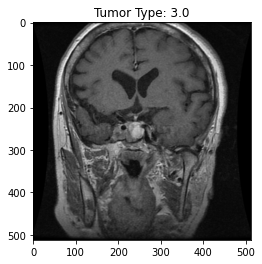

In [12]:
# Display image
plt.imshow(sample_mat_data['cjdata']['image'], cmap='gray')
plt.title(f"Tumor Type: {sample_mat_data['cjdata']['label']}")
plt.show()

Number of tumor types: 3: {'pituitary': 930, 'glioma': 1426, 'meningioma': 708}


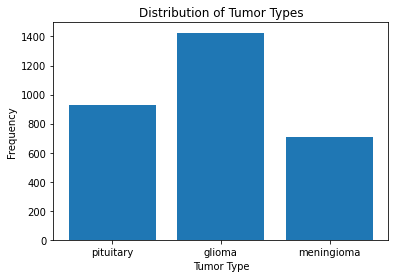

In [22]:
# Distribution of Tumor Types
label_to_type = {1: "meningioma", 2: "glioma", 3: "pituitary"}
type_to_label = {v: k for k, v in label_to_type.items()}

tumor_type_counts = {}

# Create a dataframe from all mat files
for mat_file in brain_tumor_dataset.file_list:
    mat_data = mat73.loadmat(mat_file)
    label = mat_data["cjdata"]["label"]

    tumor_type = label_to_type[label.item()]

    if tumor_type_counts.get(tumor_type) is None:
        tumor_type_counts[tumor_type] = 1
    else:
        tumor_type_counts[tumor_type] += 1

print(f'There are {len(tumor_type_counts)} distinct tumor types: {tumor_type_counts}')
# Plotting the distribution of tumor types
plt.bar(tumor_type_counts.keys(), tumor_type_counts.values())
plt.xlabel("Tumor Type")
plt.ylabel("Frequency")
plt.title("Distribution of Tumor Types")
plt.show()

### Get Started with MNIST and CASS
* NOTE this code below differs in some areas from the CASS.ipynb file in the MedMNIST example folder. I think we may need to move to the CASS.ipynb implementation as this is what is used with the rest of the model code. - Jack 4/3
* UPDATE made the switch to CASS.ipynb code from original implementation from the getting started code - Jack 4/7

In [23]:
%pip install medmnist

import medmnist
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms


from tqdm import tqdm
from medmnist import INFO, Evaluator

DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [24]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/


In [25]:
data_flag = "pathmnist"
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
# brian edit batch size down from 128 to see if this affects GPU out of memory issue
BATCH_SIZE = 8
lr = 0.001

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

In [26]:
%pip install pytorch_lightning

import os
import numpy as np
import pytorch_lightning as pl
import torch
import pandas as pd
import timm
import torch.nn as nn

from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import KFold
from torchvision import transforms as tsfm
from pytorch_lightning import Trainer, seed_everything
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning import seed_everything
from torchcontrib.optim import SWA
from torchmetrics import Metric
from torch.utils.tensorboard import SummaryWriter

DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


/Users/robbieli/School/CS598 - Deep Learning for Healthcare/project-team-58/project-58-env/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Running device on {device}')
seed_everything(77)

Global seed set to 77


cpu


77

In [60]:
# NOTE switched code below to what is used in the CASS.ipynb medmnist example instead of MNIST Get-started-CASS.ipynb
# preprocessing
"""
Define train & valid image transformation
"""
DATASET_IMAGE_MEAN = (0.485, 0.456, 0.406)
DATASET_IMAGE_STD = (0.229, 0.224, 0.225)

train_transform = tsfm.Compose(
    [
        tsfm.Resize((384, 384)),
        tsfm.RandomApply(
            [
                tsfm.ColorJitter(0.2, 0.2, 0.2),
                tsfm.RandomPerspective(distortion_scale=0.2),
            ],
            p=0.3,
        ),
        tsfm.RandomApply(
            [
                tsfm.RandomAffine(degrees=10),
            ],
            p=0.3,
        ),
        tsfm.RandomVerticalFlip(p=0.3),
        tsfm.RandomHorizontalFlip(p=0.3),
        tsfm.ToTensor(),
        tsfm.Normalize(DATASET_IMAGE_MEAN, DATASET_IMAGE_STD),
    ]
)

valid_transform = tsfm.Compose(
    [
        tsfm.Resize((384, 384)),
        tsfm.ToTensor(),
        tsfm.Normalize(DATASET_IMAGE_MEAN, DATASET_IMAGE_STD),
    ]
)

# Load the data
train_dataset = DataClass(split="train", transform=train_transform, download=download)
val_dataset = DataClass(split="val", transform=valid_transform, download=download)
test_dataset = DataClass(split="test", transform=valid_transform, download=download)

# pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_samples = 8400
train_sampler = data.RandomSampler(train_dataset, num_samples=train_samples)
train_loader = data.DataLoader(
    dataset=train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler
)
# train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_samples = 900
val_sampler = data.RandomSampler(val_dataset, num_samples=val_samples)
valid_loader = data.DataLoader(
    dataset=val_dataset, batch_size=BATCH_SIZE, sampler=val_sampler
)
# valid_loader = data.DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)

train_loader_at_eval = data.DataLoader(
    dataset=train_dataset, batch_size=2 * BATCH_SIZE, sampler=train_sampler
)
# train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

test_samples = 700
test_sampler = data.RandomSampler(test_dataset, num_samples=test_samples)
test_loader = data.DataLoader(
    dataset=test_dataset, batch_size=2 * BATCH_SIZE, sampler=test_sampler
)
# test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/robbieli/.medmnist/pathmnist.npz
Using downloaded and verified file: /Users/robbieli/.medmnist/pathmnist.npz
Using downloaded and verified file: /Users/robbieli/.medmnist/pathmnist.npz


In [44]:
print(train_dataset)
print("===================")
print(test_dataset)

print(train_loader)
print("===================")
print(test_loader)

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /Users/robbieli/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-C

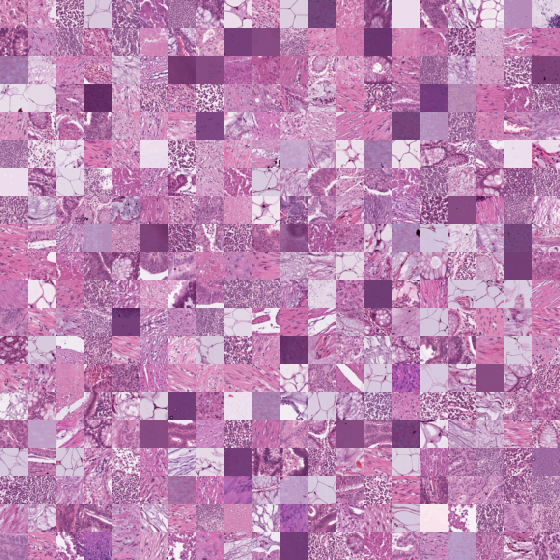

In [61]:
# Print a montage of the dataset
train_dataset.montage(length=20)

In [46]:
label_num2str = {
    0: "adipose",
    1: "background",
    2: "debris",
    3: "lymphocytes",
    4: "mucus",
    5: "smooth muscle",
    6: "normal colon mucosa",
    7: "cancer-associated stroma",
    8: "colorectal adenocarcinoma epithelium",
}

print(f'label_num2str: {label_num2str}')

label_str2num={}
for i in label_num2str:
    label_str2num[label_num2str[i]]=i

print(f'label_str2num: {label_str2num}')


label_num2str: {0: 'adipose', 1: 'background', 2: 'debris', 3: 'lymphocytes', 4: 'mucus', 5: 'smooth muscle', 6: 'normal colon mucosa', 7: 'cancer-associated stroma', 8: 'colorectal adenocarcinoma epithelium'}
label_str2num: {'adipose': 0, 'background': 1, 'debris': 2, 'lymphocytes': 3, 'mucus': 4, 'smooth muscle': 5, 'normal colon mucosa': 6, 'cancer-associated stroma': 7, 'colorectal adenocarcinoma epithelium': 8}


In [62]:
# Normalize the array data between a specified range
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


# assign array and range
# array_1d = dist.values()
# range_to_normalize = (0.2, 1)
# normalized_array_1d = normalize(
#    array_1d, range_to_normalize[0],
#  range_to_normalize[1])

# display original and normalized array
# print("Original Array = ", array_1d)
# print("Normalized Array = ", normalized_array_1d)

## Model (Brain Tumor Dataset)

### CFG (Config)

In [63]:
# imports
import os
import numpy as np
import pytorch_lightning as pl
import torch
import pandas as pd
import timm
import math
import torch.nn as nn

from tqdm import tqdm
from PIL import Image
from torchvision import transforms as tsfm
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torchcontrib.optim import SWA
from torchmetrics import Metric
from torch.utils.tensorboard import SummaryWriter

In [64]:
# CFG Class
class CFG:
    imgs_dir = f'dataset_path/brain-tumor-dataset'
    # model info
    # label info
    # update this label info with brain tumor dataset in mind
    # The label_num2str and label_str2num dictionaries should reflect the labels present in your brain tumor dataset (e.g., 'meningioma', 'glioma', 'pituitary tumor').
    # 1 for meningioma, 2 for glioma, 3 for pituitary tumor
    label_num2str = {1.0: "meningioma", 2.0: "glioma", 3.0: "pituitary tumor"}
    label_str2num = {"meningioma": 1.0, "glioma": 2.0, "pituitary tumor": 3.0}
    fl_alpha = 1.0  # alpha of focal_loss
    fl_gamma = 2.0  # gamma of focal_loss
    # Class Weights: The cls_weight should be calculated based on the distribution of your classes in the brain tumor dataset.
    cls_weight = [1.0, 1.0, 1.0]
    cnn_name = "resnet50"
    vit_name = "vit_base_patch16_384"
    seed = 77
    # Number of Classes: Update the num_classes to match the number of unique labels in your dataset.
    num_classes = 3
    batch_size = 16
    t_max = 16
    lr = 1e-3
    min_lr = 1e-6
    n_fold = 6
    num_workers = 8
    accum_grad_batch = 1
    early_stop_delta = 1e-7
    gpu_idx = 0
    device = torch.device(f"cuda:{gpu_idx}" if torch.cuda.is_available() else "cpu")
    gpu_list = [gpu_idx]

### Focal Loss

In [65]:
"""
Define Focal-Loss

cls_weights Configuration: Adjust the CFG.cls_weight array to match the frequency of each tumor type in your dataset.
This should reflect the inverse frequency of each class or other heuristics that you find suitable for balancing the class influence in loss calculation.
"""


class FocalLoss(nn.Module):
    """
    The focal loss for fighting against class-imbalance
    """

    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = 1e-12  # prevent training from Nan-loss error
        self.cls_weights = torch.tensor(
            [CFG.cls_weight], dtype=torch.float, requires_grad=False, device=CFG.device
        )

    def forward(self, logits, target):
        """
        logits & target should be tensors with shape [batch_size, num_classes]
        """
        probs = torch.sigmoid(logits)
        one_subtract_probs = 1.0 - probs
        # add epsilon
        probs_new = probs + self.epsilon
        one_subtract_probs_new = one_subtract_probs + self.epsilon
        # calculate focal loss
        log_pt = target * torch.log(probs_new) + (1.0 - target) * torch.log(
            one_subtract_probs_new
        )
        pt = torch.exp(log_pt)
        focal_loss = -1.0 * (self.alpha * (1 - pt) ** self.gamma) * log_pt
        focal_loss = focal_loss * self.cls_weights
        return torch.mean(focal_loss)

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(77)
cfg=CFG()

Global seed set to 77


In [66]:
# calculate mean, std for images

def compute_mean_std(loader):
    # Variables to store total sum of all pixel values and total count of pixels
    channel_sum, channel_squared_sum, num_batches = 0, 0, 0

    for data in loader:
        images = data["image"]
        # Rearrange batch to be the shape of [B, C, W * H]
        images = images.view(images.size(0), images.size(1), -1)
        # Compute mean and std here
        mean = images.mean(2).sum(0)
        std = images.var(2).sum(0)

        channel_sum += mean
        channel_squared_sum += std
        num_batches += 1

    # Final mean and std
    mean = channel_sum / num_batches
    std = (channel_squared_sum / num_batches) ** 0.5

    return mean, std


# Assuming your DataLoader is set up correctly and images are in the expected format
mean, std = compute_mean_std(data_loader)
print("Mean:", mean.item(), "Standard Deviation:", std.item())

Keys in the sample .mat file: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Keys in the sample .mat file: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Keys in the sample .mat file: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Keys in the sample .mat file: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])


RuntimeError: stack expects each tensor to be equal size, but got [40] at entry 0 and [28] at entry 1

In [72]:
"""
Define train & valid image transformation
"""
import torchvision
import torchvision.transforms as tsfm

# print torchvision version to validate
print(f'torchvision version: {torchvision.__version__}')

# Define train & valid image transformations for grayscale images
DATASET_IMAGE_MEAN = (
    0.485,
)  # Single-channel mean; consider recalculating based on your dataset
DATASET_IMAGE_STD = (
    0.229,
)  # Single-channel std; consider recalculating based on your dataset

train_transform = tsfm.Compose(
    [
        tsfm.Resize(
            (384, 384), interpolation=tsfm.InterpolationMode.BILINEAR
        ),  # Resize images
        tsfm.RandomApply(
            [
                # CUDA version runs older version of torchvision with different parameters
                # tsfm.RandomAffine(
                #     degrees=10,
                #     translate=None,
                #     scale=None,
                #     shear=None,
                #     resample=False,
                #     fillcolor=0,
                # )  # Random affine transformation

                # torchvision 0.17 has different parameters
                tsfm.RandomAffine(
                    degrees=10,
                    translate=None,
                    scale=None,
                    shear=None,
                )  # Random affine transformation
            ],
            p=0.3,
        ),
        tsfm.RandomHorizontalFlip(p=0.3),  # Horizontal flip
        tsfm.RandomVerticalFlip(p=0.3),  # Vertical flip
        tsfm.ToTensor(),  # Convert images to PyTorch tensors
        tsfm.Normalize(DATASET_IMAGE_MEAN, DATASET_IMAGE_STD),  # Normalize images
    ]
)

valid_transform = tsfm.Compose(
    [
        tsfm.Resize(
            (384, 384), interpolation=tsfm.InterpolationMode.BILINEAR
        ),  # Resize images
        tsfm.ToTensor(),  # Convert images to PyTorch tensors
        tsfm.Normalize(DATASET_IMAGE_MEAN, DATASET_IMAGE_STD),  # Normalize images
    ]
)

torchvision version: 0.17.2


## Model (MedMNIST)

The model includes the model definitation which usually is a class, model training, and other necessary parts.

- Model architecture: layer number/size/type, activation function, etc
- The "CFG" class in the code below references both a CNN (ResNet) and a Transformer Model (Vision Transformer (ViT) ), characteristic of the CASS Model
- Training objectives: loss function, optimizer, weight of each loss term, etc
Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
- The code of model should have classes of the model, functions of model training, model validation, etc.
- If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.

### CFG
* Used throughout code
* Appears to be different in general CASS.ipynb and the MedMNIST example.
* Below is from the MedMNIST example CASS.ipynb code.

In [73]:
class CFG:
    # We dont need to give the path to CSV and images as medMNIST provides dataloaders out of hte box.
    # Check MNIST Get-started-DEDL.ipynb for details on how to get the label to num, num to label and
    # class weights for the MedMNIST dataset.
    label_num2str = {0: 'adipose', 1: 'background', 2: 'debris', 3: 'lymphocytes', 4: 'mucus', 5: 'smooth muscle', 6: 'normal colon mucosa', 7: 'cancer-associated stroma', 8: 'colorectal adenocarcinoma epithelium'}
    label_str2num = {'adipose': 0,
 'background': 1,
 'debris': 2,
 'lymphocytes': 3,
 'mucus': 4,
 'smooth muscle': 5,
 'normal colon mucosa': 6,
 'cancer-associated stroma': 7,
 'colorectal adenocarcinoma epithelium': 8}
    fl_alpha = 1.0  # alpha of focal_loss
    fl_gamma = 2.0  # gamma of focal_loss
    cls_weight =  [0.4368473694738948, 0.4597319463892779, 0.5959191838367675, 0.6024804960992198, 0.21920384076815363, 0.8874974994999001, 0.2, 0.4424484896979396, 1.0]
    cnn_name='resnet50'
    vit_name='vit_base_patch16_384'
    seed = 77
    num_classes = 9
    batch_size = 16
    t_max = 16
    lr = 1e-3
    min_lr = 1e-6
    n_fold = 6
    num_workers = 8
    gpu_idx = 0
    device = torch.device(f'cuda:{gpu_idx}' if torch.cuda.is_available() else 'cpu')
    gpu_list = [gpu_idx]

### Focal Loss
* Used later in the model
* Appears to be the same in general CASS.ipynb and the MedMNIST example.

In [74]:
"""
Define Focal-Loss
"""


class FocalLoss(nn.Module):
    """
    The focal loss for fighting against class-imbalance
    """

    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = 1e-12  # prevent training from Nan-loss error
        self.cls_weights = torch.tensor(
            [CFG.cls_weight], dtype=torch.float, requires_grad=False, device=CFG.device
        )

    def forward(self, logits, target):
        """
        logits & target should be tensors with shape [batch_size, num_classes]
        """
        probs = torch.sigmoid(logits)
        one_subtract_probs = 1.0 - probs
        # add epsilon
        probs_new = probs + self.epsilon
        one_subtract_probs_new = one_subtract_probs + self.epsilon
        # calculate focal loss
        log_pt = target * torch.log(probs_new) + (1.0 - target) * torch.log(
            one_subtract_probs_new
        )
        pt = torch.exp(log_pt)
        focal_loss = -1.0 * (self.alpha * (1 - pt) ** self.gamma) * log_pt
        focal_loss = focal_loss * self.cls_weights
        return torch.mean(focal_loss)

### F1 Score
* Appears to be the same in general CASS.ipynb and the MedMNIST example.
* Can modify to get recall as well (see comment below)

In [75]:
"""
Define F1 score metric
"""


class MyF1Score(Metric):
    def __init__(self, cfg, threshold: float = 0.5, dist_sync_on_step=False):
        super().__init__(dist_sync_on_step=dist_sync_on_step)
        self.cfg = cfg
        self.threshold = threshold
        self.add_state("tp", default=torch.tensor(0), dist_reduce_fx="sum")
        self.add_state("fp", default=torch.tensor(0), dist_reduce_fx="sum")
        self.add_state("fn", default=torch.tensor(0), dist_reduce_fx="sum")

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        # assert preds.shape == target.shape
        preds_str_batch = self.num_to_str(torch.sigmoid(preds))
        target_str_batch = self.num_to_str(target)
        tp, fp, fn = 0, 0, 0
        for pred_str_list, target_str_list in zip(preds_str_batch, target_str_batch):
            for pred_str in pred_str_list:
                if pred_str in target_str_list:
                    tp += 1
                if pred_str not in target_str_list:
                    fp += 1

            for target_str in target_str_list:
                if target_str not in pred_str_list:
                    fn += 1
        self.tp += tp
        self.fp += fp
        self.fn += fn

    def compute(self):
        # To switch between F1 score and recall.
        f1 = 2.0 * self.tp / (2.0 * self.tp + self.fn + self.fp)
        rec = self.tp / (self.tp + self.fn)
        return f1

    def num_to_str(self, ts: torch.Tensor) -> list:
        batch_bool_list = (ts > self.threshold).detach().cpu().numpy().tolist()
        batch_str_list = []
        for one_sample_bool in batch_bool_list:
            # print(self.cfg.label_num2str)
            lb_str_list = [
                self.cfg.label_num2str[lb_idx]
                for lb_idx, bool_val in enumerate(one_sample_bool)
                if bool_val
            ]
            batch_str_list.append(lb_str_list)
        return batch_str_list

### CNN and Transformer Setup

In [76]:
cfg = CFG()
model_cnn = timm.create_model(cfg.cnn_name, pretrained=True)
model_vit = timm.create_model(cfg.vit_name, pretrained=True)
model_cnn.to(device)
model_vit.to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /Users/robbieli/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1):

### Self-Supervised Learning (SSL) Train Function
* From MedMNIST example code
* Almost identical to general CASS.ipynb (see one comment below for difference).
* Also included loss function which is same in both CASS files

In [84]:
# Brian Approach 4/11
# The authors had 2 parameters that weren't used in the model definition so I got rid of them (criterion_vit, criterion_cnn)
# this wasn't used in either of their CASS MEDNIST notebooks

import torch
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torch
import torch.cuda as cuda


def ssl_train_model(
    train_loader,
    model_vit,
    optimizer_vit,
    scheduler_vit,
    model_cnn,
    optimizer_cnn,
    scheduler_cnn,
    num_epochs,
):
    writer = SummaryWriter()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    phase = "train"
    model_cnn.train()
    model_vit.train()

    # print(cuda.memory_summary(device=device, abbreviated=False))

    for i in tqdm(range(num_epochs)):
        with torch.set_grad_enabled(phase == "train"):
            current_sample_idx = 0
            for img, _ in tqdm(train_loader):
                img = img.to(device)

                # use for debugging
                # print(f"Start of loop - {cuda.memory_summary(device=device, abbreviated=True)}")
                pred_vit = model_vit(img)
                pred_cnn = model_cnn(img)

                model_sim_loss = loss_fn(pred_vit, pred_cnn)
                loss = model_sim_loss.mean()

                loss.backward()

                optimizer_cnn.step()
                optimizer_vit.step()
                scheduler_cnn.step()
                scheduler_vit.step()

                print(f"(Epoch {i}) image {current_sample_idx} | loss: {loss.item()}")
                # print("For -", i, "Loss:", loss.item())
                writer.add_scalar("Self-Supervised Loss/train", loss.item(), i)

                del img, pred_vit, pred_cnn, model_sim_loss, loss
                current_sample_idx += 1

        # Save checkpoint
        torch.save(
            {
                "epoch": i,
                "model_vit": model_vit.state_dict(),
                "model_cnn": model_cnn.state_dict(),
                "optimizer_vit": optimizer_vit.state_dict(),
                "optimizer_cnn": optimizer_cnn.state_dict(),
                "scheduler_vit": scheduler_vit.state_dict(),
                "scheduler_cnn": scheduler_cnn.state_dict(),
            },
            f"checkpoint_{i}.pt",
        )

    writer.flush()


def loss_fn(x, y):
    x = torch.nn.functional.normalize(x, dim=-1, p=2)
    y = torch.nn.functional.normalize(y, dim=-1, p=2)
    return 2 - 2 * (x * y).sum(dim=-1)

## Training
* Below we perform both self=supervised training (CASS) and supervised training via CNN and ViT
* Computational Requirements: We are able to get through a clean run of self supervised training using the V100 GPU on the Google Colab Notebook (this required a paid Colab Pro account). We are also able to run through the supervised CNN training although this part of the code still needs modifications to work as expected. Finally, when training the ViT model we run into a CUDA memory error. It is worth noting that many adjustments had to be made to even get to this point where we could successfully complete self supervised training. We sampled a subset of the medMNIST dataset, only trained for 1 epoch, and lowered batch size to 8.

In [78]:
optimizer_cnn = SWA(torch.optim.Adam(model_cnn.parameters(), lr=1e-3))
optimizer_vit = SWA(torch.optim.Adam(model_vit.parameters(), lr=1e-3))
scheduler_cnn = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_cnn, T_max=16, eta_min=1e-6
)
scheduler_vit = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_vit, T_max=16, eta_min=1e-6
)

fl_alpha = 1.0  # alpha of focal_loss
fl_gamma = 2.0  # gamma of focal_loss
cls_weight = [0.9475164011246484, 0.4934395501405811, 0.5029053420805999, 0.2, 1.0]

# these are unused (brian 4/11)
# criterion_vit = FocalLoss(fl_alpha, fl_gamma)
# criterion_cnn = FocalLoss(fl_alpha, fl_gamma)

In [86]:
# brian version 4/11
# has unused params removed

print(f'Number of training samples: {len(train_loader)}')

ssl_train_model(
    train_loader,
    model_vit,
    optimizer_vit,
    scheduler_vit,
    model_cnn,
    optimizer_cnn,
    scheduler_cnn,
    num_epochs=1,
)
# Saving SSL Models
print("Saving Cov-T")

torch.save(model_cnn, "./cass-r50-med-mnist-pathmnist.pt")
torch.save(model_vit, "./cass-vit-med-mnist-pathmnist.pt")

Number of training samples: 1050


  0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
import math

# TODO Commented out line below because indenting was off for a for loop and did not see it used at all
#for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(all_img_names)):
model_vit=torch.load('./cass-vit-med-mnist-pathmnist.pt')
model_cnn=torch.load('./cass-r50-med-mnist-pathmnist.pt')
last_loss=math.inf
val_loss_arr=[]
train_loss_arr=[]
counter=0

model_cnn.to(device)
model_vit.to(device)
print('*'*10)


#Train Correspong Supervised CNN
print('Fine tunning Cov-T')
writer = SummaryWriter()
model_cnn.fc=nn.Linear(in_features=2048, out_features=9, bias=True)
criterion = FocalLoss(cfg.fl_alpha, cfg.fl_gamma)
metric = MyF1Score(cfg)
val_metric=MyF1Score(cfg)
optimizer = torch.optim.Adam(model_cnn.parameters(), lr = 3e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=cfg.t_max,eta_min=cfg.min_lr)
model_cnn.train()
from torch.autograd import Variable
best=0
best_val=0
for epoch in tqdm(range(1)):
    total_loss = 0
    for images,label in train_loader:
        model_cnn.train()
        images = images.to(device)
        label = label.to(device)
        model_cnn.to(device)
        pred_ts=model_cnn(images)
        loss = criterion(pred_ts, label)
        #print(pred_ts.shape)
        #print(label.shape)
        score = metric(pred_ts,label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()
        total_loss += loss.detach()
    avg_loss=total_loss/ len(train_loader)
    train_score=metric.compute()
    logs = {'train_loss': avg_loss, 'train_f1': train_score, 'lr': optimizer.param_groups[0]['lr']}
    writer.add_scalar("CNN Supervised Loss/train", loss, epoch)
    writer.add_scalar("CNN Supervised F1/train", train_score, epoch)
    print(logs)
    if best < train_score:
        best=train_score
        model_cnn.eval()
        total_loss = 0
        for images,label in valid_loader:
            images = images.to(device)
            label = label.to(device)
            model_cnn.to(device)
            pred_ts=model_cnn(images)
            score_val = val_metric(pred_ts,label)
            val_loss = criterion(pred_ts, label)
            total_loss += val_loss.detach()
        avg_loss=total_loss/ len(train_loader)
        print('Val Loss:',avg_loss)
        val_score=val_metric.compute()
        print('CNN Validation Score:',val_score)
        writer.add_scalar("CNN Supervised F1/Validation", val_score, epoch)
        if avg_loss > last_loss:
            counter+=1
        else:
            counter=0

        last_loss = avg_loss
        if counter > 5:
            print('Early Stopping!')
            break
        else:
            if val_score > best_val:
                best_val=val_score
                print('Saving')
                torch.save(model_cnn,
                    './cass-r50-med-mnist-pathmnist-label.pt')
writer.flush()
last_loss=999999999
val_loss_arr=[]
train_loss_arr=[]
counter=0
# Training the Corresponding ViT
model_vit.head=nn.Linear(in_features=768, out_features=9, bias=True)
criterion = FocalLoss(cfg.fl_alpha, cfg.fl_gamma)
metric = MyF1Score(cfg)
optimizer = torch.optim.Adam(model_vit.parameters(), lr = 3e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=cfg.t_max,eta_min=cfg.min_lr)
model_vit.train()
val_metric=MyF1Score(cfg)
writer = SummaryWriter()
from torch.autograd import Variable
best=0
best_val=0
for epoch in tqdm(range(1)):
    total_loss = 0
    for images,label in train_loader:
        model_vit.train()
        images = images.to(device)
        label = label.to(device)
        model_vit.to(device)
        pred_ts=model_vit(images)
        loss = criterion(pred_ts, label)
        score = metric(pred_ts,label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()
        total_loss += loss.detach()
    avg_loss=total_loss/ len(train_loader)
    train_score=metric.compute()
    logs = {'train_loss': loss, 'train_f1': train_score, 'lr': optimizer.param_groups[0]['lr']}
    writer.add_scalar("ViT Supervised Loss/train", loss, epoch)
    writer.add_scalar("ViT Supervised F1/train", train_score, epoch)
    print(logs)
    if best < train_score:
        best=train_score
        model_vit.eval()
        total_loss = 0
        for images,label in valid_loader:
            images = images.to(device)
            label = label.to(device)
            model_vit.to(device)
            pred_ts=model_vit(images)
            score_val = val_metric(pred_ts,label)
            val_loss = criterion(pred_ts, label)
            total_loss += val_loss.detach()
        avg_loss=total_loss/ len(train_loader)
        val_score=val_metric.compute()
        print('ViT Validation Score:',val_score)
        print('Val Loss:',avg_loss)
        writer.add_scalar("ViT Supervised F1/Validation", val_score, epoch)
        if avg_loss > last_loss:
            counter+=1
        else:
            counter=0

        last_loss = avg_loss
        if counter > 5:
            print('Early Stopping!')
            break
        else:
            if val_score > best_val:
                best_val=val_score
                print('Saving')
                torch.save(model_vit,
                                   './cass-vit-med-mnist-pathmnist.pt')

    writer.flush()
    print('*'*10)

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (MyF1Score). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


**********
Fine tunning Cov-T


  0%|          | 0/1 [00:00<?, ?it/s]

{'train_loss': tensor(nan, device='cuda:0'), 'train_f1': tensor(0.0176), 'lr': 0.0002077111731385758}


100%|██████████| 1/1 [02:17<00:00, 137.51s/it]


Val Loss: tensor(nan, device='cuda:0')
CNN Validation Score: tensor(0.)


  0%|          | 0/1 [00:00<?, ?it/s]

{'train_loss': tensor(-1.5085e+17, device='cuda:0', grad_fn=<MeanBackward0>), 'train_f1': tensor(0.1804), 'lr': 0.0002077111731385758}


  0%|          | 0/1 [05:17<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 122.00 MiB (GPU 0; 15.77 GiB total capacity; 13.72 GiB already allocated; 68.38 MiB free; 14.32 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Evaluation

In this section, you should finish training your model training or loading your trained model. That is a great experiment! You should share the results with others with necessary metrics and figures.

Please test and report results for all experiments that you run with:

specific numbers (accuracy, AUC, RMSE, etc)
figures (loss shrinkage, outputs from GAN, annotation or label of sample pictures, etc)

* We are still working out the final stages of our training section, specifically the supervised learning that follows the initial self-supervised representation learning via CASS. Therefore, we are lacking in metrics right now. However, you can see above in the self-supervised training output that we progressively get lower and lower loss values as we step through the self supervised learning process for our training dataset.

# Results

Discussion
In this section,you should discuss your work and make future plan. The discussion should address the following questions:

Make assessment that the paper is reproducible or not.
Explain why it is not reproducible if your results are kind negative.
Describe “What was easy” and “What was difficult” during the reproduction.
Make suggestions to the author or other reproducers on how to improve the reproducibility.
What will you do in next phase.

* Results: For the medMNIST dataset, we were able to successfully reproduce CASS for representational learning. There were many difficulties along the way, mainly due to computational requirements for the model training and limitations in computing resources. The GitHub repo for the paper was also not perfect and we had to make many adjustments to get the code to compile and run with successful results. We are not able to overcome these obstacles yet for the supervised learning component.

* Analysis: The output throughout the notebook above shows evidence of EDA, model definitions, and training results. As mentioned above in evaluation, the loss values for CASS in the training output show successful completion for one epoch. The self-supervised portion of this is still in work as we ran into computational hurdles and complications in reproducing the models.

* Plans: Our plans for the next phase begin with completion of supervised learning. We will then consider our ablation studies. In doing both of these we will have to work through the computational limitations presented. We may also look to get the implementation working with a second dataset (Brain Tumor), which has EDA shown above.

# References

Singh, P. & Cirrone, J. (2023). Efficient Representation Learning for Healthcare with Cross-Architectural Self-Supervision. Proceedings of the 8th Machine Learning for Healthcare Conference, in Proceedings of Machine Learning Research, 219, 691-711. Available from https://proceedings.mlr.press/v219/singh23a.html.

Singh, P. (2022). Official PyTorch implementation of CASS. [Software]. Retrieved from https://github.com/pranavsinghps1/CASS.

Cheng, J. (2017, April 2). Brain tumor dataset. figshare. Retrieved from https://figshare.com/articles/dataset/brain_tumor_dataset/1512427.

Tschandl P., Rosendahl C., & Kittler H. (2018). The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data, 5, 180161. https://doi.org/10.1038/sdata.2018.161.

Codella, N. C. F., Gutman, D., Celebi, M. E., Helba, B., Marchetti, M. A., Dusza, S. W., Kalloo, A., Liopyris, K., Mishra, N., Kittler, H., & Halpern, A. (2017). Skin Lesion Analysis Toward Melanoma Detection: A Challenge at the 2017 International Symposium on Biomedical Imaging (ISBI), Hosted by the International Skin Imaging Collaboration (ISIC). arXiv:1710.05006. Retrieved from https://arxiv.org/abs/1710.05006.

Combalia, M., Codella, N. C. F., Rotemberg, V., Helba, B., Vilaplana, V., Reiter, O., Halpern, A. C., Puig, S., & Malvehy, J. (2019). BCN20000: Dermoscopic Lesions in the Wild. arXiv:1908.02288. Retrieved from https://arxiv.org/abs/1908.02288.

Yang, J., Shi, R., Wei, D., Liu, Z., Zhao, L., Ke, B., Pfister, H., & Ni, B. (2023). MedMNIST v2-A large-scale lightweight benchmark for 2D and 3D biomedical image classification. Scientific Data.

Yang, J., Shi, R., & Ni, B. (2021). MedMNIST Classification Decathlon: A Lightweight AutoML Benchmark for Medical Image Analysis. IEEE 18th International Symposium on Biomedical Imaging (ISBI).